# Assignment - 17 Support Vector Machines (Forest Fires)

## Import Necessary Libraries

In [1]:
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix


import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
forestfire = pd.read_csv(r'D:\Downloads\forestfires (1).csv')
forestfire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


## Data Understanding

In [3]:
forestfire.shape

(517, 31)

In [4]:
forestfire.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
forestfire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

## Model Preparation

In [6]:
forestfire1 = forestfire.drop(['dayfri','daymon','daysat','daysun','daythu','daytue','daywed','monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul','monthjun','monthmar','monthmay','monthnov','monthoct','monthsep'],axis = 1,inplace=False)
forestfire1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,small
...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,small


In [7]:
labelencoding = preprocessing.LabelEncoder()
forestfire1['month'] = labelencoding.fit_transform(forestfire1['month'])
forestfire1['day'] = labelencoding.fit_transform(forestfire1['day'])
forestfire1['size_category'] = labelencoding.fit_transform(forestfire1['size_category'])

In [8]:
forestfire1

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,1


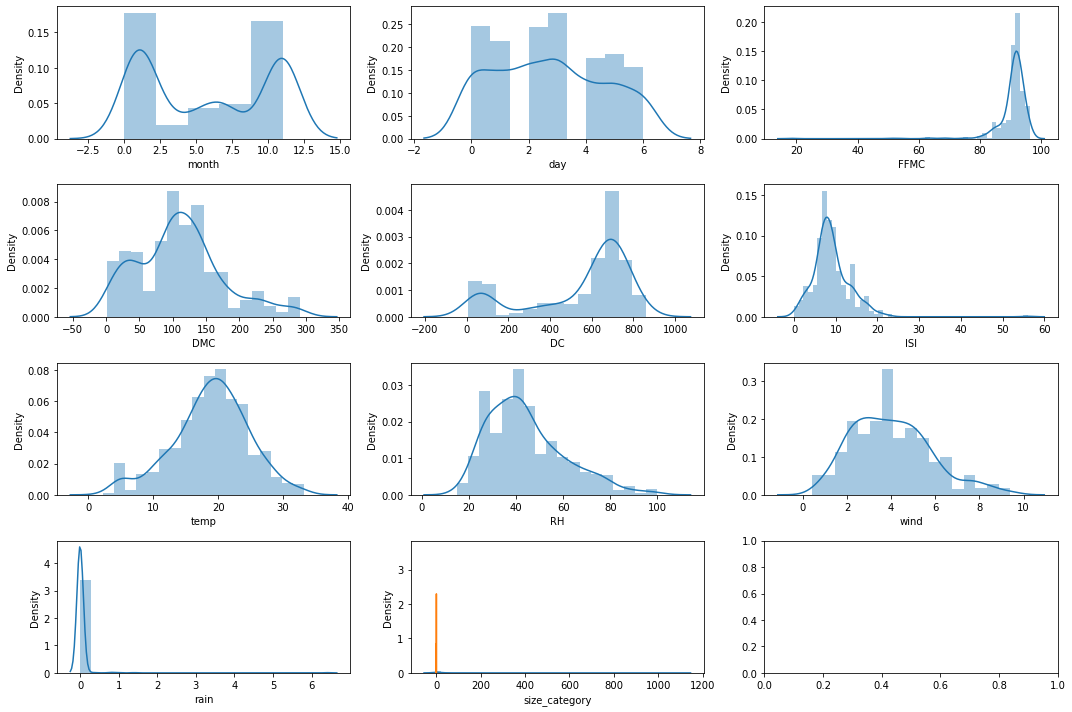

In [9]:
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.distplot(forestfire1.month, ax=ax[0,0])
sns.distplot(forestfire1.day, ax=ax[0,1])
sns.distplot(forestfire1.FFMC, ax=ax[0,2])
sns.distplot(forestfire1.DMC, ax=ax[1,0])
sns.distplot(forestfire1.DC, ax=ax[1,1])
sns.distplot(forestfire1.ISI, ax=ax[1,2])
sns.distplot(forestfire1.temp, ax=ax[2,0])
sns.distplot(forestfire1.RH, ax=ax[2,1])
sns.distplot(forestfire1.wind, ax=ax[2,2])
sns.distplot(forestfire1.rain, ax=ax[3,0])
sns.distplot(forestfire1.area, ax=ax[3,1])
sns.distplot(forestfire1.size_category, ax=ax[3,1])
plt.tight_layout()
plt.show()

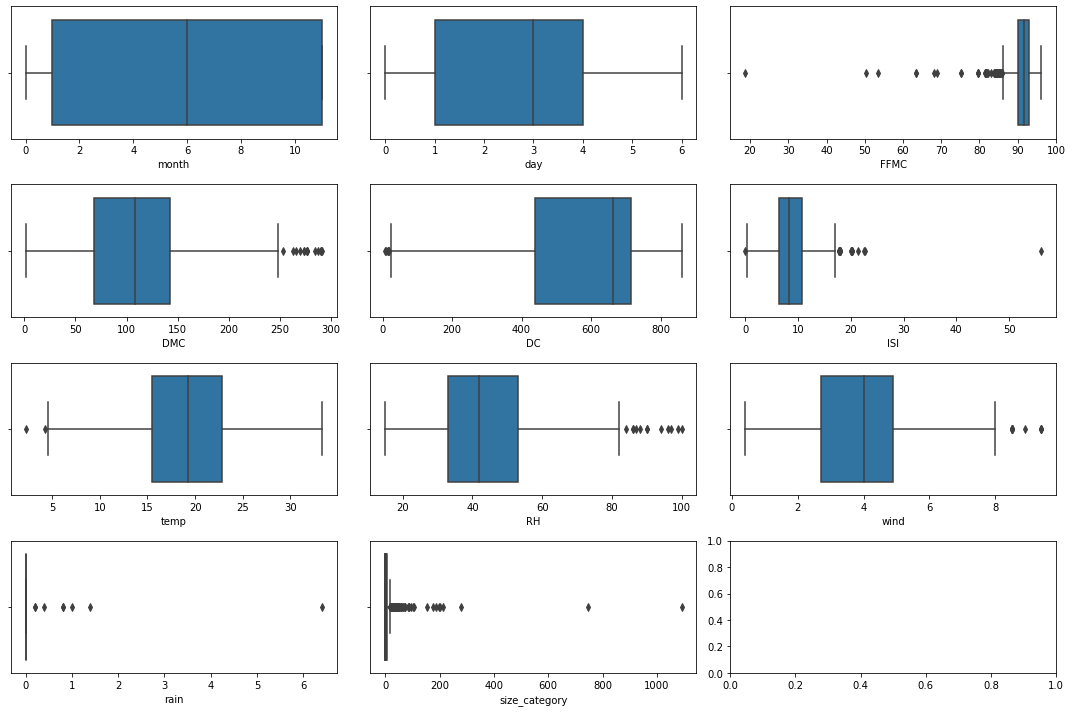

In [10]:
fig, ax = plt.subplots(4,3, figsize=(15,10))
sns.boxplot(forestfire1.month, ax=ax[0,0])
sns.boxplot(forestfire1.day, ax=ax[0,1])
sns.boxplot(forestfire1.FFMC, ax=ax[0,2])
sns.boxplot(forestfire1.DMC, ax=ax[1,0])
sns.boxplot(forestfire1.DC, ax=ax[1,1])
sns.boxplot(forestfire1.ISI, ax=ax[1,2])
sns.boxplot(forestfire1.temp, ax=ax[2,0])
sns.boxplot(forestfire1.RH, ax=ax[2,1])
sns.boxplot(forestfire1.wind, ax=ax[2,2])
sns.boxplot(forestfire1.rain, ax=ax[3,0])
sns.boxplot(forestfire1.area, ax=ax[3,1])
sns.boxplot(forestfire1.size_category, ax=ax[3,1])
plt.tight_layout()
plt.show()

## Model Preparation

In [11]:
x = forestfire1.drop('size_category' , axis= 1)
y = forestfire1[['size_category']]

In [12]:
x

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...
512,1,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,1,3,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,1,3,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,2,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [13]:
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


## Model Building // Model Evaluation

In [14]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.20 ,stratify=y)

### Linear Kernal

In [15]:
select_model = SVC(kernel = 'linear')

In [16]:
select_model.fit(x_train,y_train)

SVC(kernel='linear')

In [17]:
x_train.shape , y_train.shape

((413, 11), (413, 1))

In [18]:
x_test.shape , y_test.shape

((104, 11), (104, 1))

In [19]:
y_pred=select_model.predict(x_test)

In [20]:
%%time
print('Accuracy Score : ',accuracy_score(y_test,y_pred).round(4))
print('Precision score : ',precision_score(y_test,y_pred).round(4))
print('Recall Score : ',recall_score(y_test,y_pred).round(4))
print('Confusion Matrix :\n' ,confusion_matrix(y_test,y_pred))

Accuracy Score :  0.9904
Precision score :  0.987
Recall Score :  1.0
Confusion Matrix :
 [[27  1]
 [ 0 76]]
CPU times: total: 15.6 ms
Wall time: 13.9 ms


### Polynomial Kernal

In [21]:
select_model1 = SVC(kernel = 'poly')

In [22]:
select_model1.fit(x_train,y_train)

SVC(kernel='poly')

In [23]:
y_pred1=select_model1.predict(x_test)

In [24]:
%%time
print('Accuracy Score : ',accuracy_score(y_test,y_pred1).round(4))
print('Precision score : ',precision_score(y_test,y_pred1).round(4))
print('Recall Score : ',recall_score(y_test,y_pred1).round(4))
print('Confusion Matrix :\n' ,confusion_matrix(y_test,y_pred1))

Accuracy Score :  0.8077
Precision score :  0.7917
Recall Score :  1.0
Confusion Matrix :
 [[ 8 20]
 [ 0 76]]
CPU times: total: 0 ns
Wall time: 9.37 ms


### Radial Kernal

In [25]:
select_model2 = SVC(kernel = 'rbf')

In [26]:
select_model2.fit(x_train,y_train)

SVC()

In [27]:
y_pred2=select_model2.predict(x_test)

In [28]:
%%time
print('Accuracy Score : ',accuracy_score(y_test,y_pred2 ).round(4))
print('Precision score : ',precision_score(y_test,y_pred2).round(4))
print('Recall Score : ',recall_score(y_test,y_pred2).round(4))
print('Confusion Matrix :\n' ,confusion_matrix(y_test,y_pred2))

Accuracy Score :  0.75
Precision score :  0.7451
Recall Score :  1.0
Confusion Matrix :
 [[ 2 26]
 [ 0 76]]
CPU times: total: 15.6 ms
Wall time: 10.1 ms
